#### Final Project Submission
* Student Name: JAMES WACHIRA MUTHEE
* Mode of Study: PART TIME
* Project: End of Phase Project
* Technical Mentor: Daniel Ekale


#### 1. Business Understanding
The increasing ease of online hotel reservations and flexible cancellation policies has led to a significant number of cancellations and no-shows, causing revenue loss and operational challenges for hotels. Predicting whether a customer will honor or cancel their reservation is crucial for effective booking management. By forecasting cancellations, hotels can take proactive measures such as overbooking, adjusting policies, or offering incentives to reduce cancellations, ultimately improving revenue, resource allocation, and customer satisfaction. This project aims to build a predictive model that helps hotels manage bookings more efficiently and reduce revenue loss.

#### 2. Problem Statement
Hotels face significant revenue loss and operational inefficiencies due to high rates of reservation cancellations and no-shows. The challenge is predicting which reservations are likely to be canceled, as this uncertainty impacts booking management and resource allocation. This project aims to develop a predictive model using historical booking data to forecast cancellations, enabling hotels to optimize revenue, reduce cancellations, and improve operational efficiency.

#### 3. Business Objectives
The objective of this project is to develop a predictive model to accurately forecast hotel reservation cancellations so as to enable hotels to:
* Optimize booking strategies and resource allocation based on cancellation predictions. 
* Minimize revenue loss by proactively managing overbooking and cancellation policies.
* Improve customer satisfaction by offering targeted incentives to reduce cancellations
  
### 4. Target Audience
The Target audience for this project are:
* Hotel Managers
* Revenue Managers
* Hotel Owners/Executives

#### 5. Data
The Hotel Reservations dataset used in this project was obtained from https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset.

#### 6. Data Understanding
Before creating the model, the following steps will be taken:

* Import the relevant libraries 
* Load Hotel reservations datasets which is in csv
* Understand the data
* Identify and fix the missing values
* Ensure the columns have the correct data type
* Create new features that will be important for our analysis

#### 7. EDA to understand Data Distribution
EDA will be done and visualizations created to understand how the data is distributed and how features are related to one another. Additionally, I shall check for Multicollinearity, Skewness of the data as well as outliers


#### 8. Data Pre-processing
This step will involve transforming raw data into a structured format suitable for modeling. The following transformations will be done to the data:
1. Feature Scaling
2. Log Transformation
3. Categorical Encoding
4. Label Encoding the Class Feature
5. Data Balancing
6. Data Splitting

#### 9. Modelling
This step will involve creating models to predict whether a customer will cancel a booking or not. Essentially, our model will be answering our business question. In this project, three models will be created:
1. Logistic Regression - Baseline Model
2. Decision Tree Model -Tuned
3. Random Forest Model -Tuned and Untuned

#### 10. Model Evaluation
This step will help us assess how well our model is performing. It will allow us to understand if the model is making accurate predictions and how it will generalize to unseen data. 

#### 11. Metrics of Success
The Models' Performance will be evaluated against two metrics:
1. Accuracy Score
2. AUC

#### 12. Findings
Upon evaluation of the model based on the metrics of success, the findings of the evaluation will be highlighted

#### 13. Conclusion
The model with the highest accuracy score and AUC will be considered the most effective for predicting hotel reservation cancellations. 

### 1. Import the Libraries

In [63]:
# Import the relevant libraries
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### 2. Load the Dataset

In [3]:
# Loading the Dataset
df = pd.read_csv("Hotel_Reservations.csv")

# Checking the first five rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### 3. Data Understanding

In [4]:
# Checking the number of rows and columns
df.shape

print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 36275 rows and 19 columns


In [5]:
# Checking the column names
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

This dataset has columns with Categorical,integers and Float data types. 5 Columns have Categorical data types, 13 Columns with integer data types and one column with Float Data type

In [7]:
# Checking for summary statistics of numerical columns
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
# Checking for unique values in each column
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

* Booking ID has the highest number of booking values of 36275 which corresponds to the length of our dataset. 
* The column for average room price follows with 3930 unique values. 
* Most columns have less than 10 unique values

In [9]:
# Checking for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

This dataset has no missing values

### 4. EDA and Visualizations to Understand Data Distribution and Feature Relationship

### 4.1 Univariate Analysis

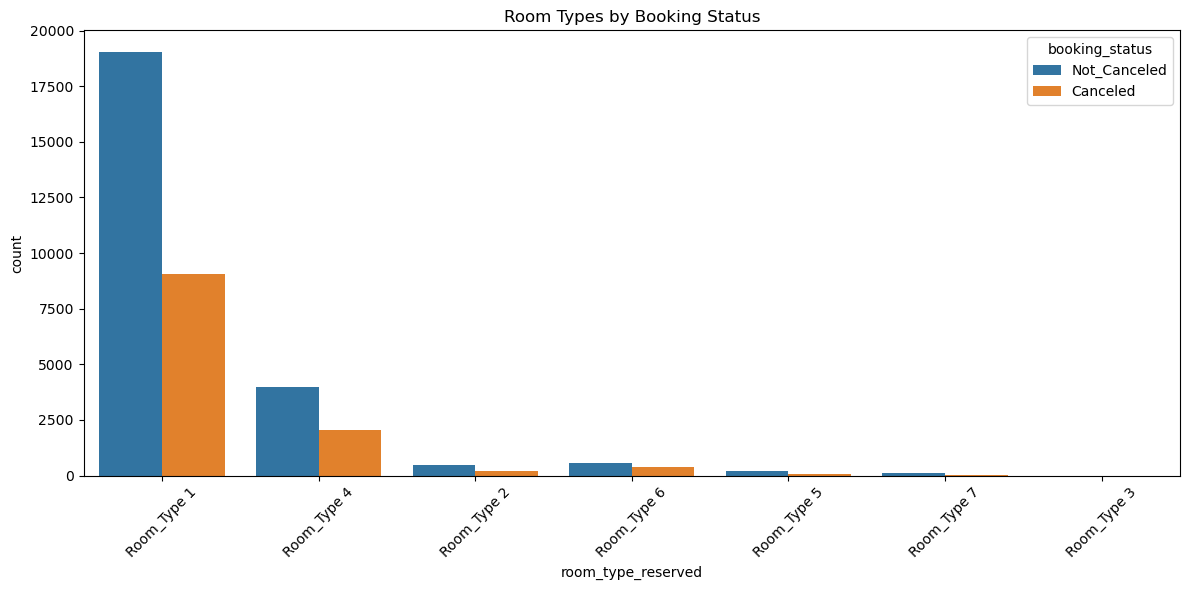

In [10]:
# Room Type and Booking Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
plt.title('Room Types by Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This countplot shows the distribution of room types by booking status, highlighting which room types are more likely to be canceled or not.

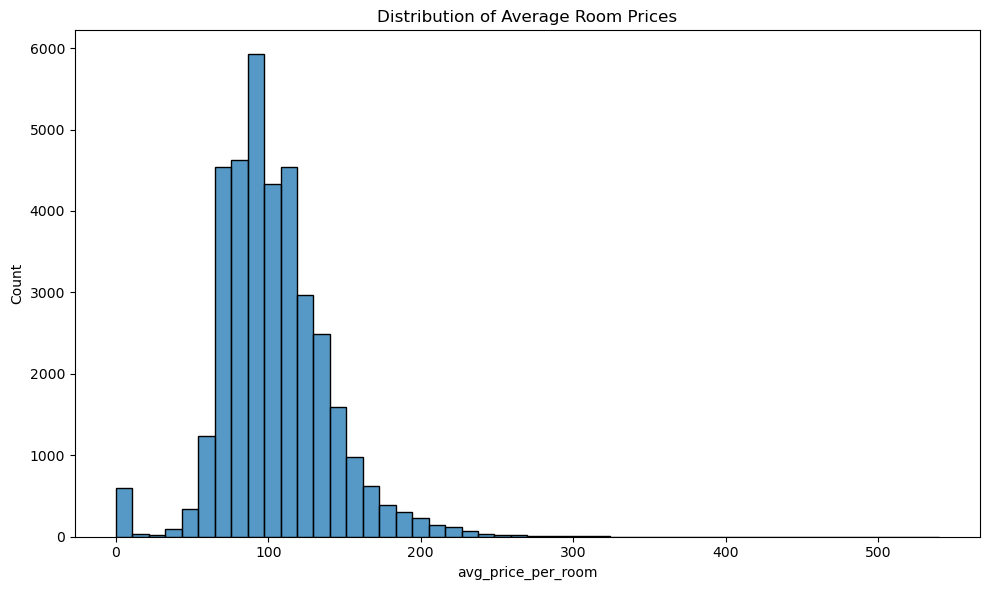

In [11]:
# Average Room Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_price_per_room', bins=50)
plt.title('Distribution of Average Room Prices')
plt.tight_layout()
plt.show()

This histogram displays the distribution of average room prices, showing the spread and concentration of pricing.


<Figure size 1200x600 with 0 Axes>

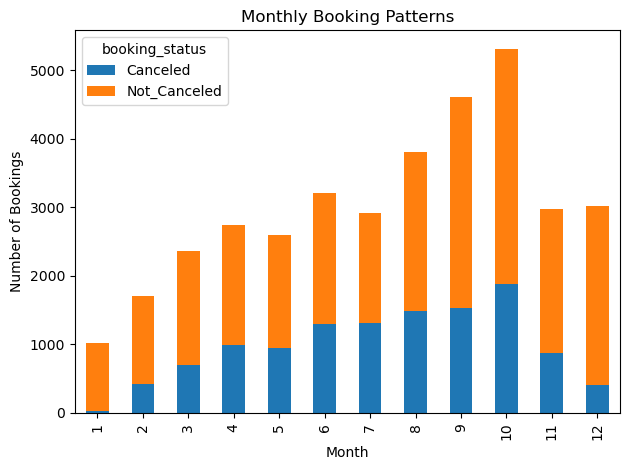

In [12]:
# Monthly Booking Patterns
plt.figure(figsize=(12, 6))
monthly_bookings = df.groupby(['arrival_month', 'booking_status']).size().unstack()
monthly_bookings.plot(kind='bar', stacked=True)
plt.title('Monthly Booking Patterns')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

This stacked bar plot shows monthly booking patterns, with stacked bars for canceled and not canceled bookings.

#### 4.2 Bivariate Analysis

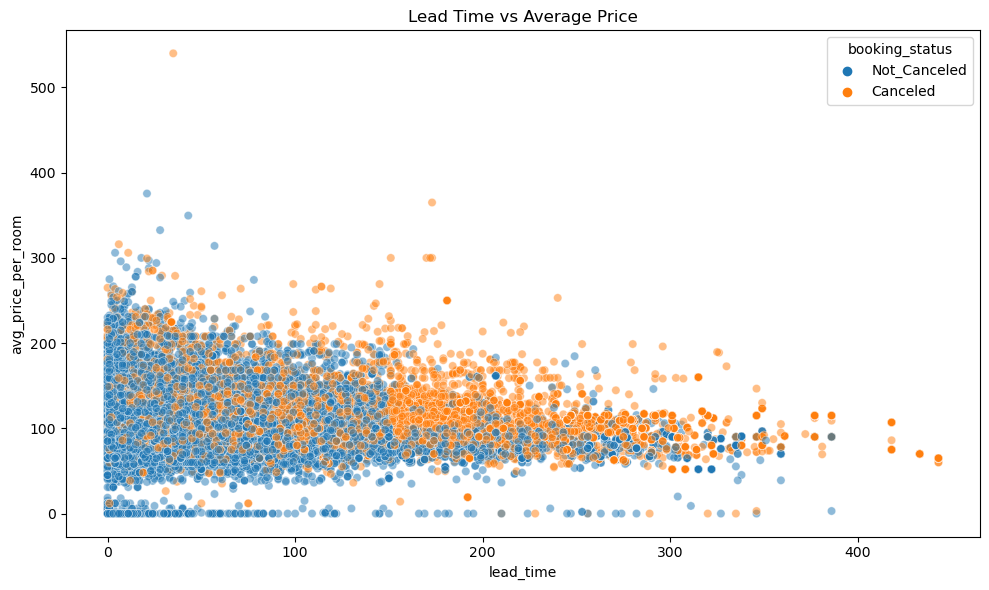

In [13]:
# Lead Time vs Price with Booking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status', alpha=0.5)
plt.title('Lead Time vs Average Price')
plt.tight_layout()
plt.show()

This scatter plot shows shows the relationship between booking lead time and room prices, revealing price variations across different booking windows

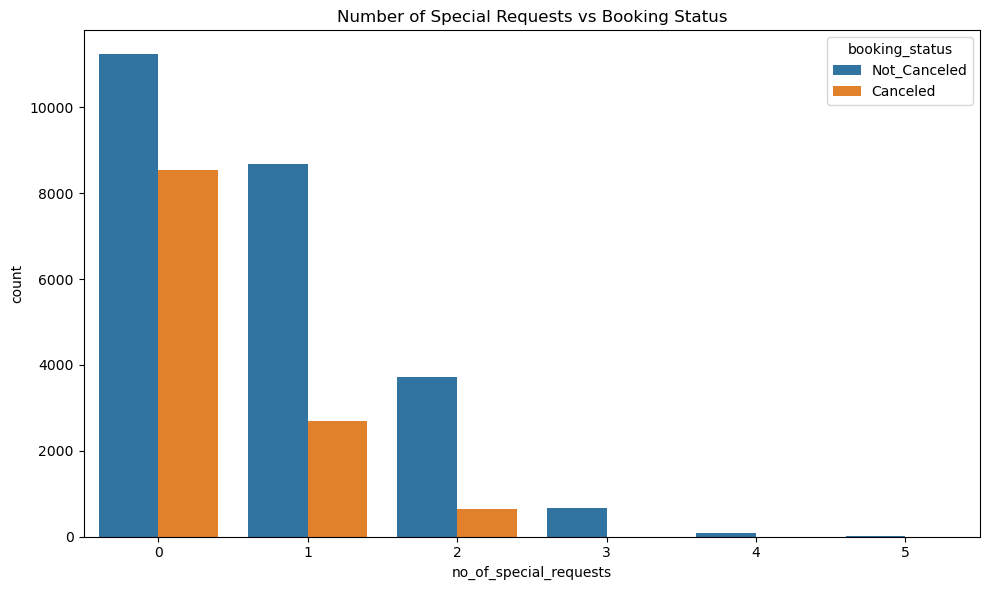

In [14]:
# Special Requests Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status')
plt.title('Number of Special Requests vs Booking Status')
plt.tight_layout()
plt.show()

This bar plot highlights the number of special requests and their relationship with booking status. It shows that non-canceled bookings tend to have more special requests

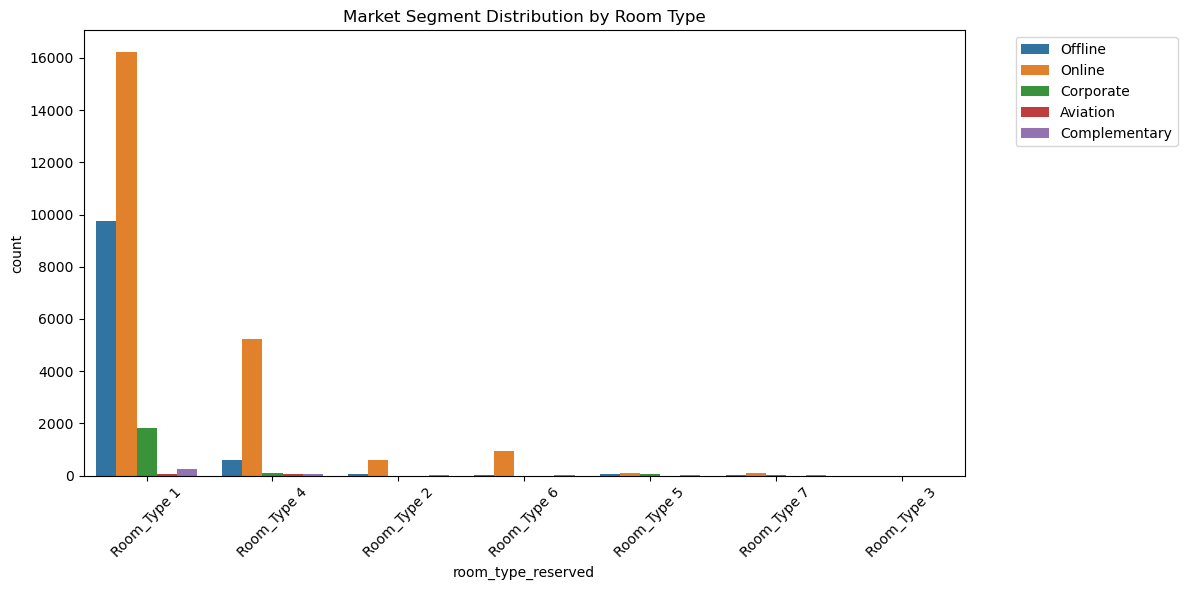

In [15]:
# Market Segment Type Distribution by Room Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='room_type_reserved', hue='market_segment_type')
plt.xticks(rotation=45)
plt.title('Market Segment Distribution by Room Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Shows the distribution of market segments across different room types, showing room type preferences by market segment

#### 4.3 Multivariate Analysis

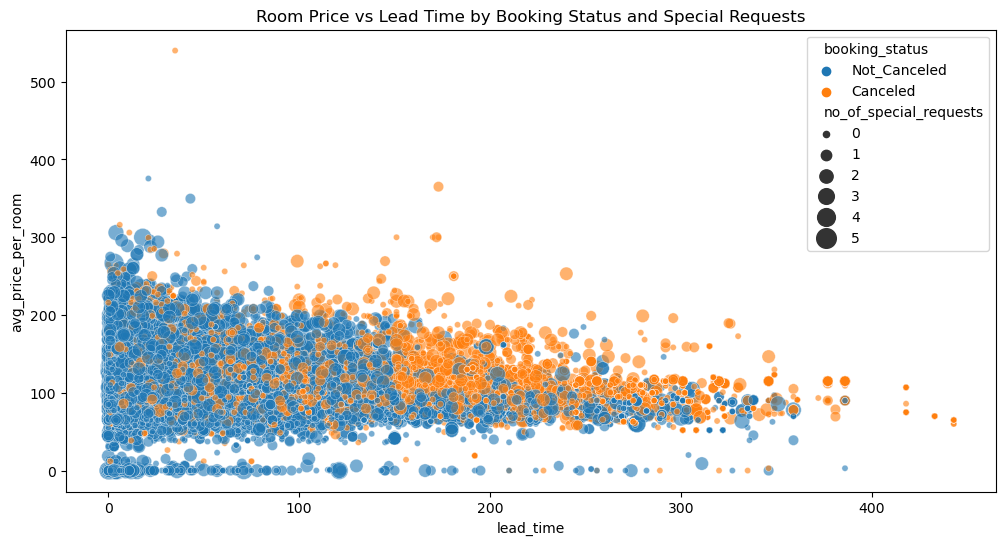

In [16]:
# Room Type vs Lead Time by Booking Status and Special Requests
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', 
                hue='booking_status', size='no_of_special_requests',
                sizes=(20, 200), alpha=0.6)
plt.title('Room Price vs Lead Time by Booking Status and Special Requests')
plt.show()

This scatterplot combines multiple variables to show how prices vary with lead time, colored by booking status and sized by special requests

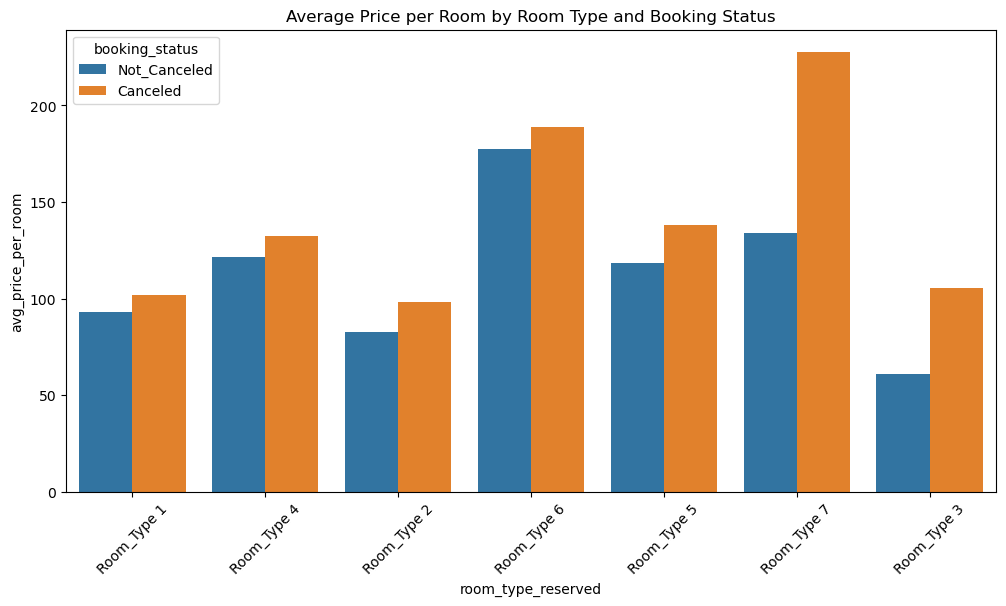

In [17]:
# Multivariate Analysis 2: Average Price per Room by Room Type and Booking Status
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='room_type_reserved', y='avg_price_per_room', hue='booking_status', errorbar=None)
plt.title('Average Price per Room by Room Type and Booking Status')
plt.xticks(rotation=45)
plt.show()

This bar graph compares room prices across different room types and booking statuses, revealing pricing patterns

#### 4.4 Checking for Outliers in our dataset

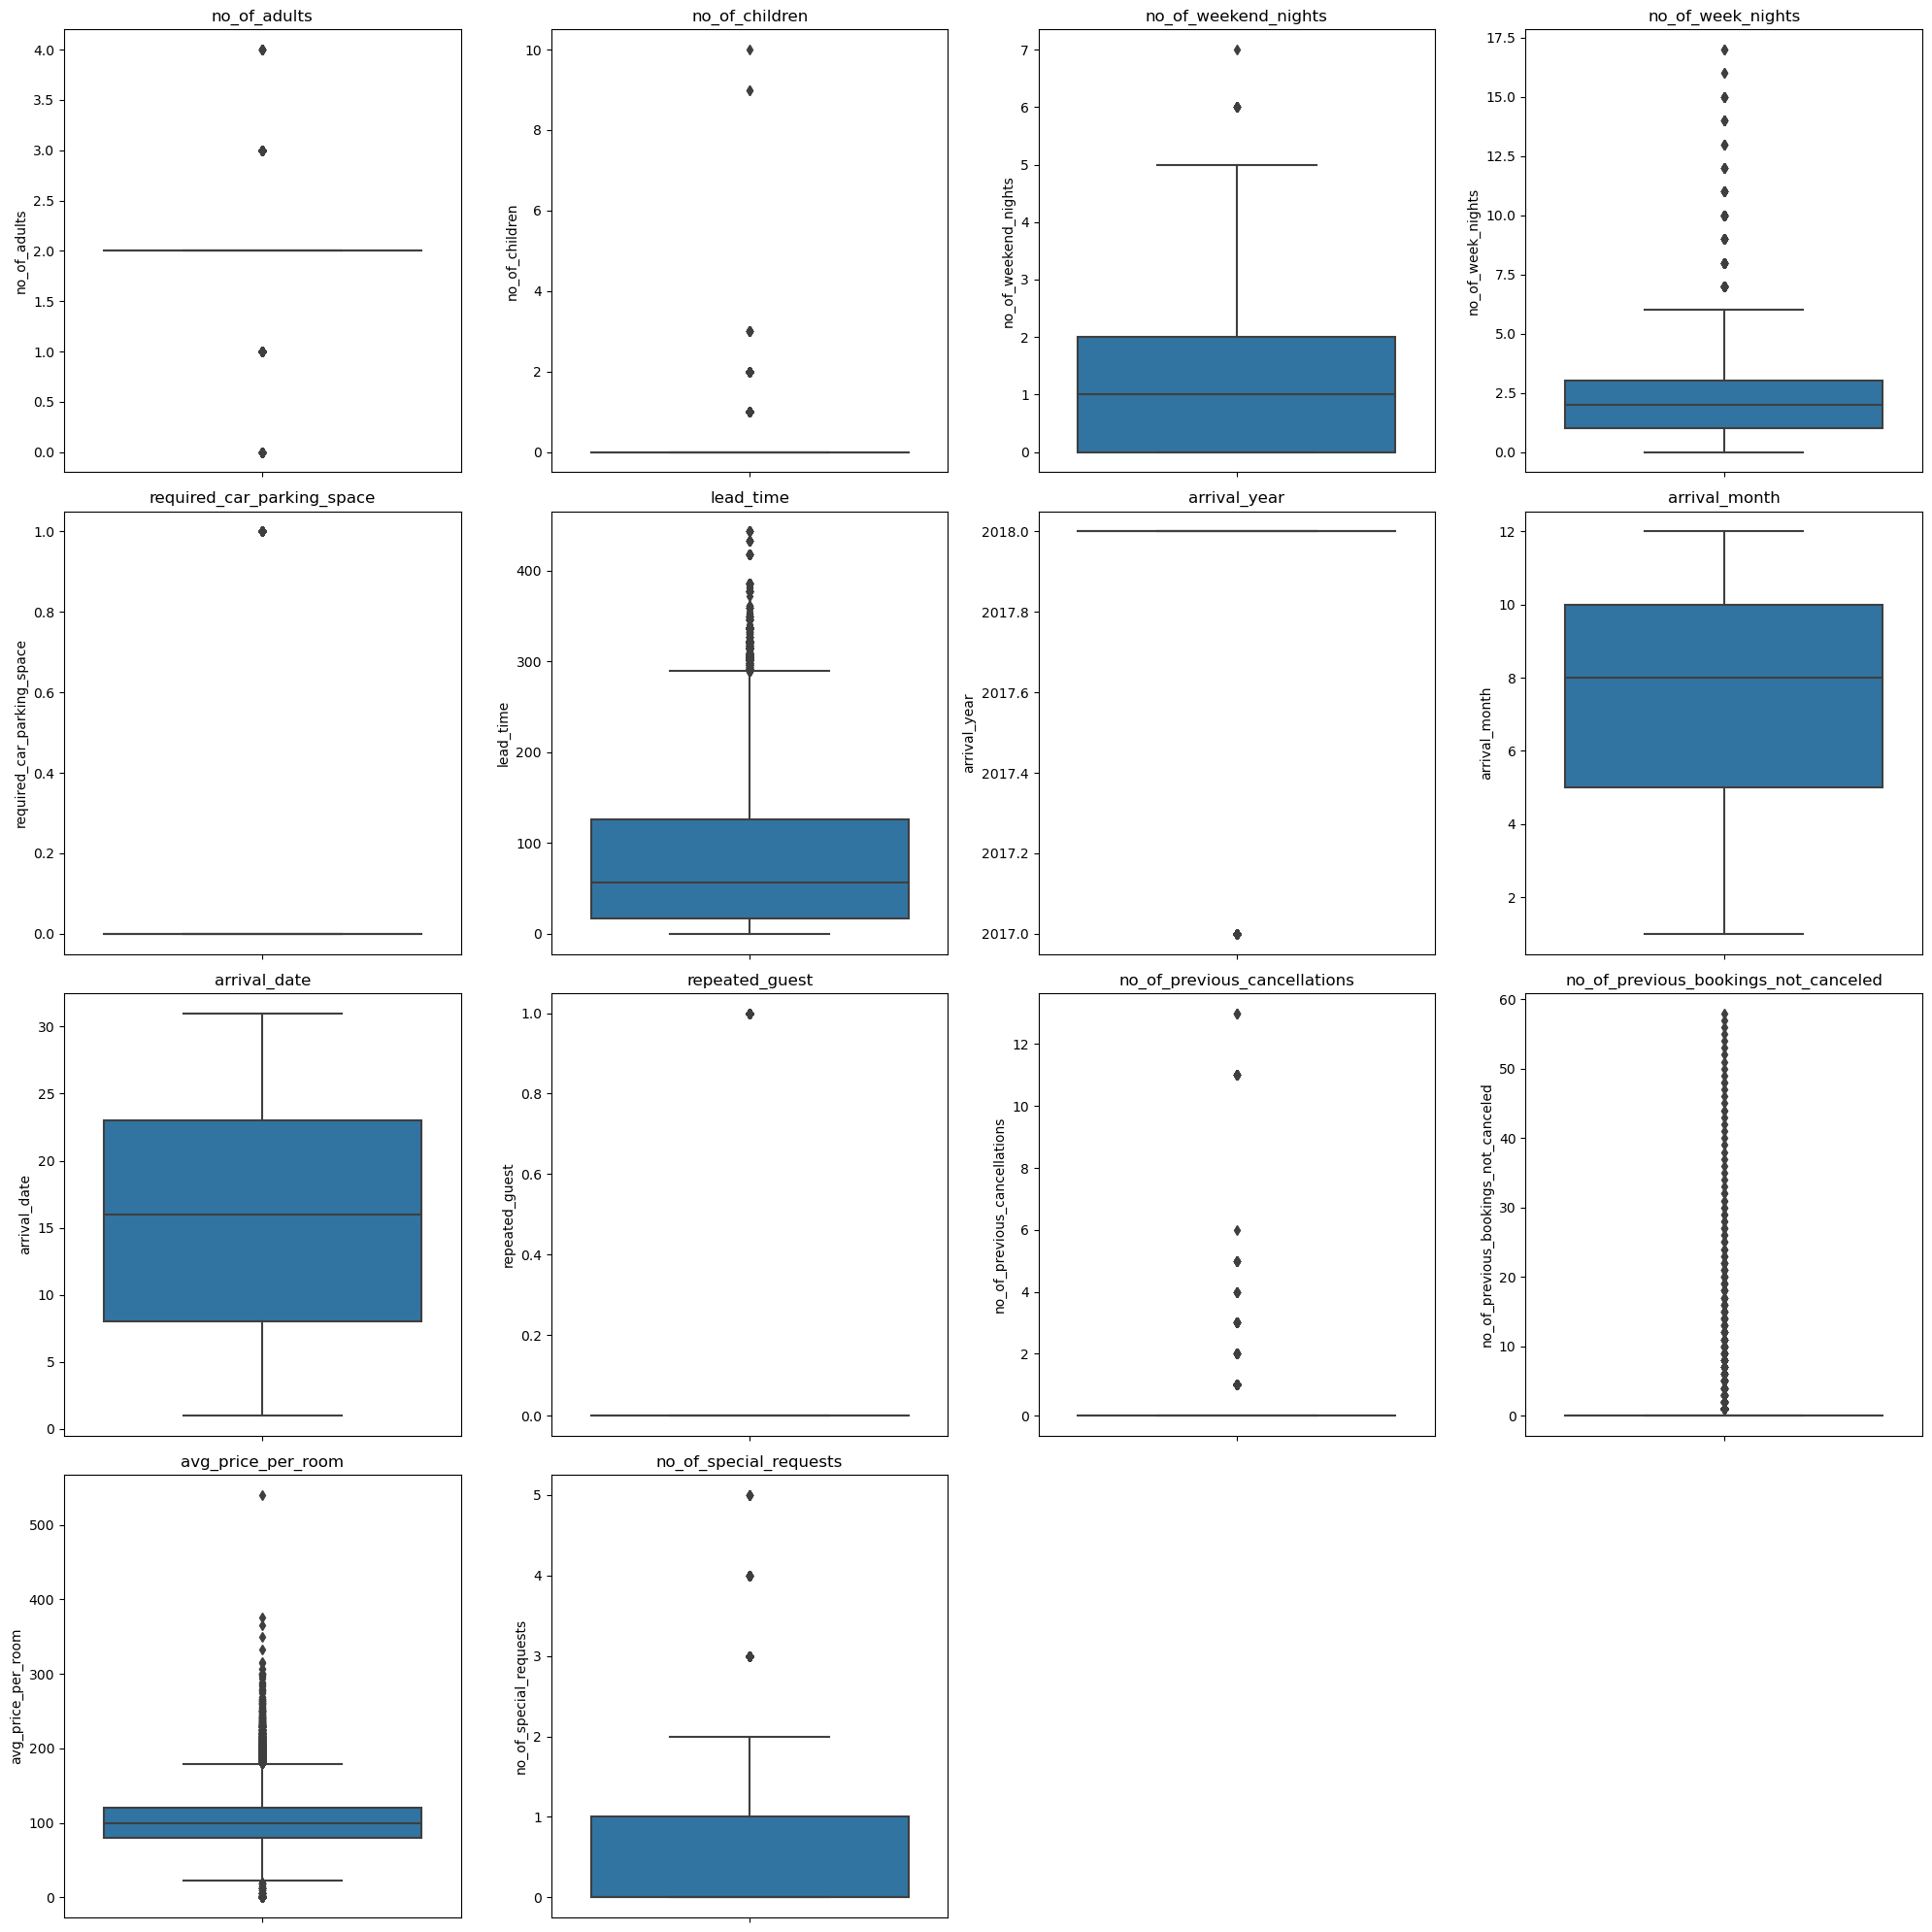

In [18]:

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for subplots
num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 4)  # Assuming 4 columns per row

# Create individual boxplots for each variable
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(col)

# Hide any unused subplots
for idx in range(num_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


From the boxplots above, the most significant outliers appear in:

* No_of_adults
* Avg_price_per_room
* Lead_time 
* No_of_children

In this project, outliers will not be removed since it would result in loss of information which is not good for our modelling since every data is important and presents real business scenarios.

How I will handle outliers for this particular project:
* Use median whenever required instead of mean for the columns with significant outliers
* Log Transform the columns that are heavily skewed and are needed for our modelling




#### 4.5 Checking for Skewness in our dataset

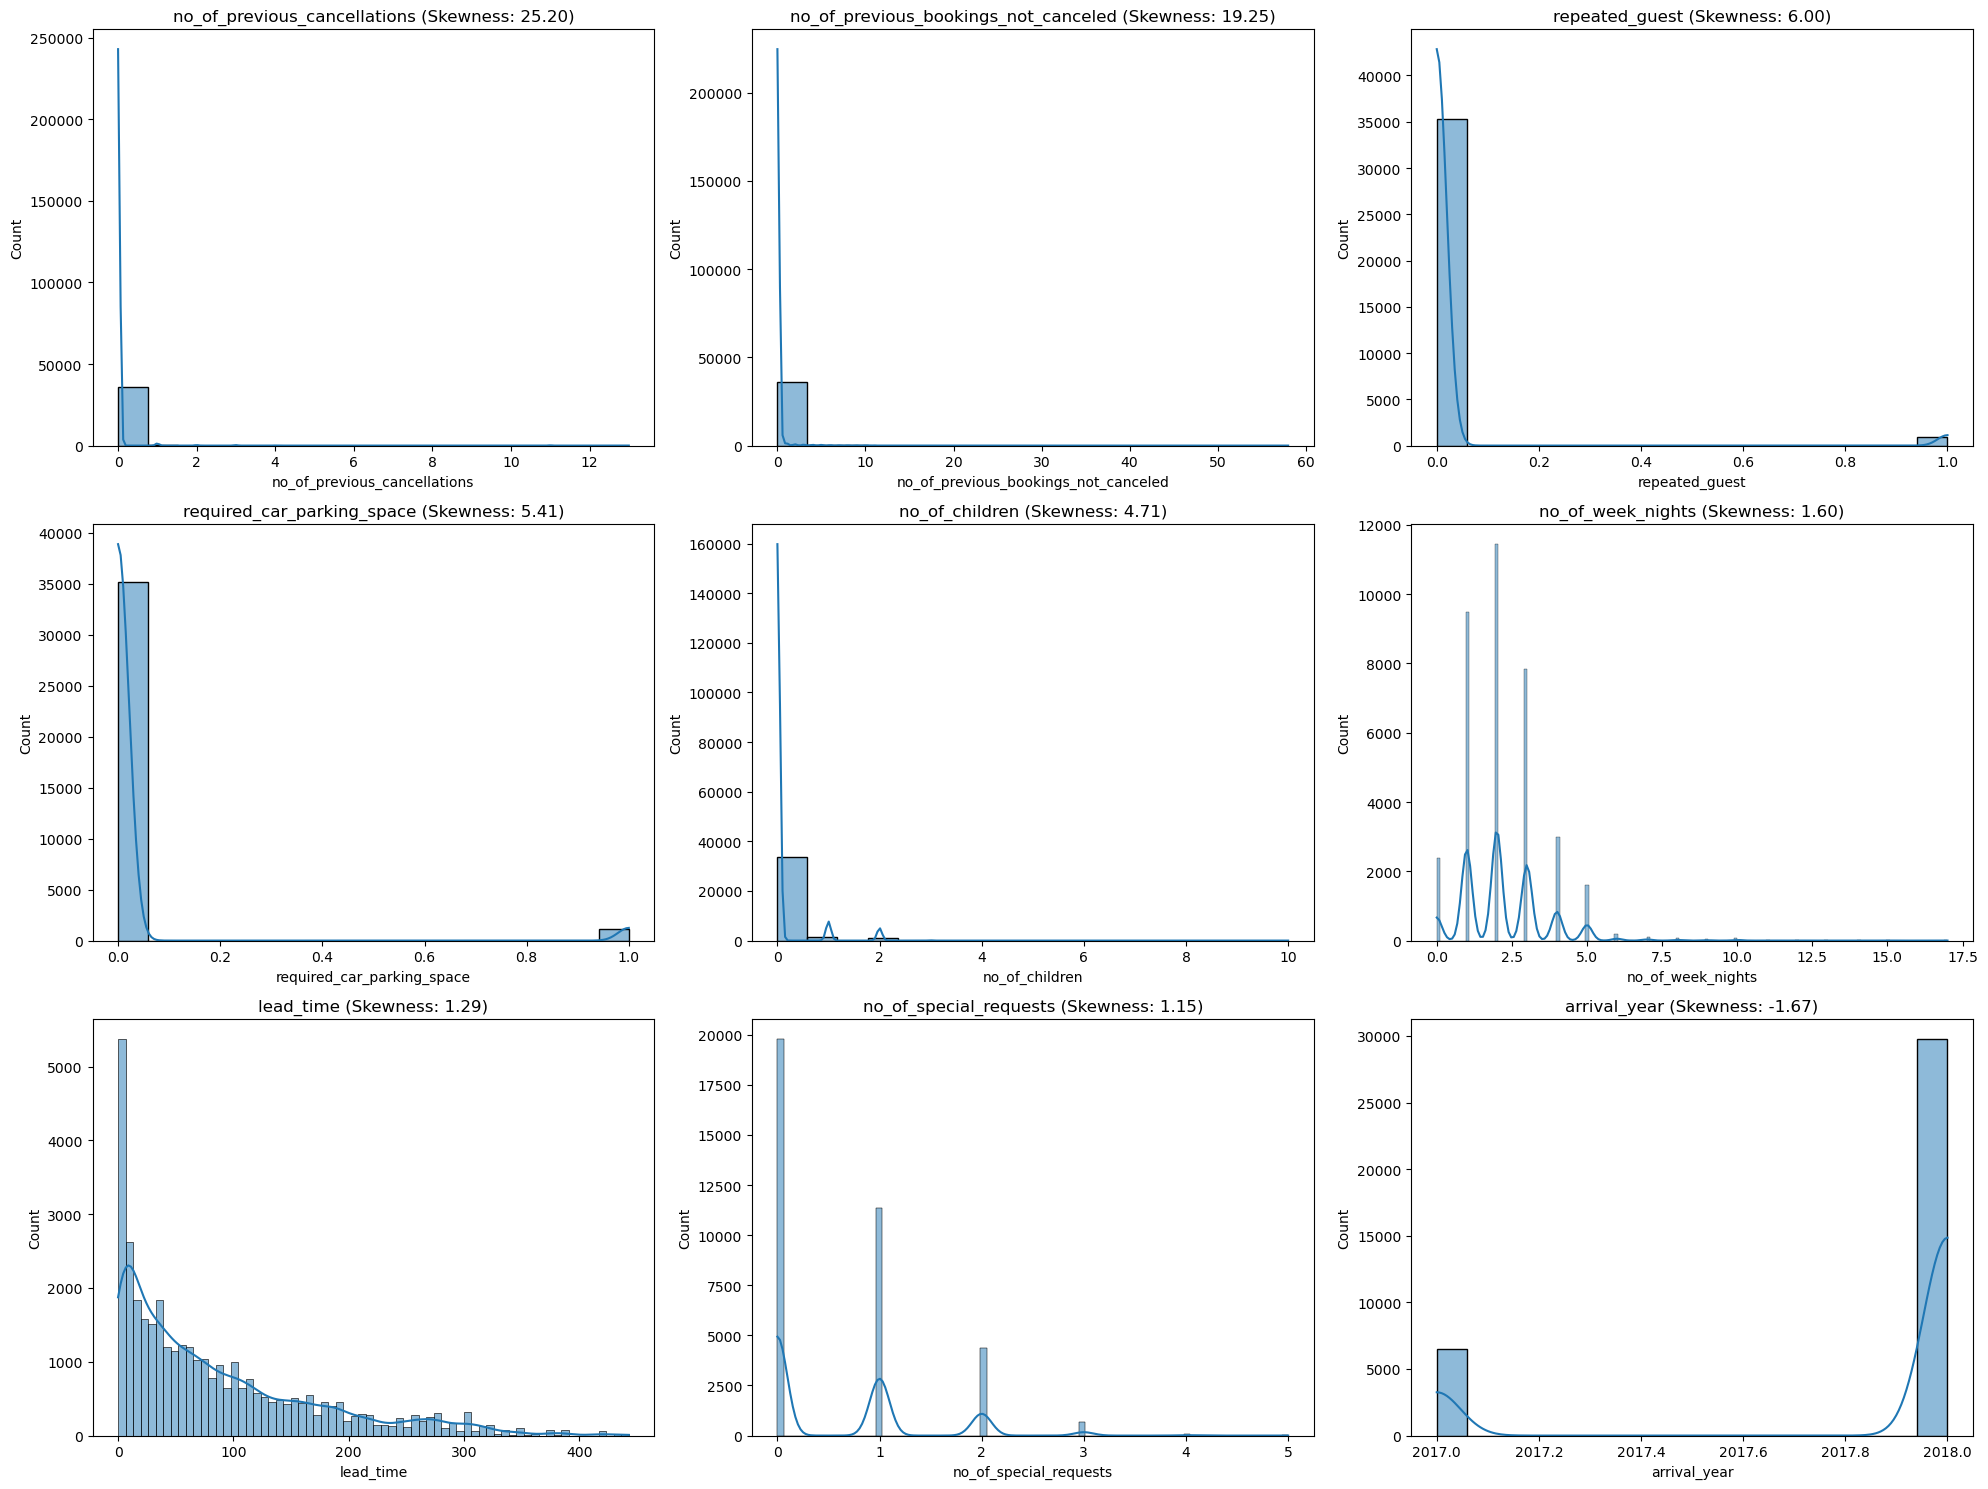

Heavily skewed columns (|skewness| > 1):
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
repeated_guest                           6.002888
required_car_parking_space               5.413643
no_of_children                           4.710350
no_of_week_nights                        1.599350
lead_time                                1.292492
no_of_special_requests                   1.145081
arrival_year                            -1.669695
dtype: float64


In [19]:
# Calculate skewness for numerical columns
skewness = df[numerical_cols].skew()

# Filter heavily skewed columns (absolute skewness > 1)
heavily_skewed = skewness[abs(skewness) > 1].sort_values(ascending=False)

# Visualize all heavily skewed columns
fig, axes = plt.subplots(3, 3, figsize=(20, 15))  
axes = axes.ravel()

for idx, (column, skew_value) in enumerate(heavily_skewed.items()):
    sns.histplot(data=df, x=column, ax=axes[idx], kde=True)
    axes[idx].set_title(f'{column} (Skewness: {skew_value:.2f})')

# Remove any unused subplots
for idx in range(len(heavily_skewed), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print("Heavily skewed columns (|skewness| > 1):")
print(heavily_skewed)

The dataset has some columns that are heavily skewed. When preparing the data for modelling, I shall do log transformation to any column that is heavily skewed and is part of modelling

### 4.6 Correlation Analysis

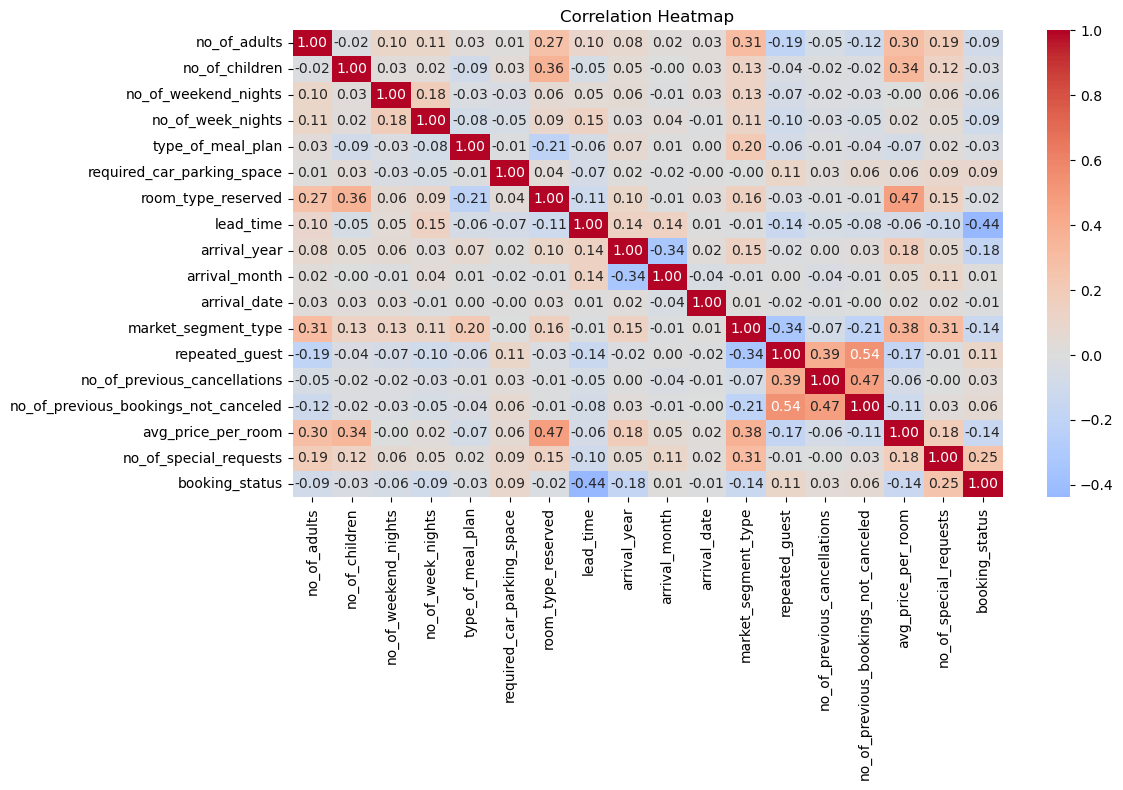

In [20]:
# Remove non-numeric columns that will not used for correlation
columns_to_drop = ['Booking_ID']
df_analysis = df.drop(columns=columns_to_drop)

# Convert categorical variables to numeric
le = LabelEncoder()
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for col in categorical_cols:
    df_analysis[col] = le.fit_transform(df_analysis[col])

# Calculate correlations
correlations = df_analysis.corr()['booking_status'].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_analysis.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

The Heatmap chart shows the correlation of all the numeric variables against the target variable, the Booking status. This Heatmap will be crucial in helping us identify the most important features to use in our modelling. In addition to the correlation, features will be selected based on their on whether they make business sense when predicting cancellations.

The correlation heatmap above indicates that there is no multicollinearity present among the features.

#### 5. Data Preprocessing

In [21]:
# Selecting columns to use for modelling
selected_columns = ['no_of_adults', 'avg_price_per_room', 'repeated_guest', 
                    'market_segment_type', 'lead_time', 'arrival_year', 
                    "no_of_special_requests",'booking_status']

# Creating a dataframe from the selected features
data = df[selected_columns].copy()

#### 5.1 Label Encoding the target variable

In [22]:
# Encoding the target variable (booking_status) using LabelEncoder
label_encoder = LabelEncoder()
data['booking_status'] = label_encoder.fit_transform(data['booking_status'])

# Check the resulting dataframe
data.head()

,no_of_adults,avg_price_per_room,repeated_guest,market_segment_type,lead_time,arrival_year,no_of_special_requests,booking_status
0,2,65.00,0,Offline,224,2017,0,1
1,2,106.68,0,Online,5,2018,1,1
2,1,60.00,0,Online,1,2018,0,0
3,2,100.00,0,Online,211,2018,0,0
4,2,94.50,0,Online,48,2018,0,0


#### 5.2 Splitting the data into train and test sets

In [23]:
#Identify dependent and independent variables
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

#Split the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of train and test datasets
print("Data Split Overview:")
print(f"Number of training samples (features): {X_train.shape[0]}")
print(f"Number of training samples (target): {y_train.shape[0]}")
print(f"Number of testing samples (features): {X_test.shape[0]}")
print(f"Number of testing samples (target): {y_test.shape[0]}")

Data Split Overview:
Number of training samples (features): 29020
Number of training samples (target): 29020
Number of testing samples (features): 7255
Number of testing samples (target): 7255


In [24]:
# Identify Categorical and Numerical data to transform
cat_cols = ["market_segment_type"]
num_cols = ["avg_price_per_room", "lead_time"]
log_transform_cols = ["repeated_guest"]
existing_cols = ["no_of_adults","arrival_year","no_of_special_requests"]

#### 5.3 Converting categorical columns to numeric on selected training set

In [25]:
# Instantiate One Hot Encoder
ohe = OneHotEncoder(drop="first", sparse_output = False)
X_train_cat = X_train.loc[:, cat_cols]

# One hot encode the training set
X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat),
                               index=X_train.index,
                               columns=ohe.get_feature_names_out(cat_cols))


In [26]:
# Checking the first few rows of the one hot encoded dataframe
X_train_cat_ohe.head()

,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
25629,0.0,0.0,0.0,1.0
14473,0.0,0.0,0.0,1.0
23720,0.0,0.0,1.0,0.0
5843,0.0,0.0,1.0,0.0
18709,0.0,0.0,1.0,0.0


#### 5.4 Scaling the training set on the selected numerical columns

In [27]:
# Instantiating the Standard Scaler
scaler = StandardScaler()
X_train_num = X_train[num_cols]

# Fit and transform on the data
scaler.fit(X_train_num)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)

# Checking the first few rows of the resulting dataframe
X_train_scaled.head()



,avg_price_per_room,lead_time
25629,1.636392,-0.691565
14473,0.512227,0.147033
23720,-0.953457,4.048843
5843,-0.889422,1.276811
18709,0.754136,1.195281


#### 5.5 Log transforming the selected skewed columns on training set

In [28]:
# Instantiate Function Transformer
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_train_transformed = X_train[log_transform_cols]

# Log Transform and create a new column for the transformed data
X_train_transformed['repeated_guest_log'] = log_transformer.fit_transform(X_train_transformed[['repeated_guest']])

# Drop the original column
X_train_log_tr = X_train_transformed.drop('repeated_guest', axis=1)


#### 5.5.1 Merging the transformed training sets with the untransformed set

In [29]:
# Concatenating the Scaled, Ohe and Log Transformed data
X_train_final = pd.concat([X_train_scaled, X_train_cat_ohe, X_train_log_tr, X_train[existing_cols]], axis=1)
X_train_final

,avg_price_per_room,lead_time,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_log,no_of_adults,arrival_year,no_of_special_requests
25629,1.636392,-0.691565,0.0,0.0,0.0,1.0,0.0,2,2017,0
14473,0.512227,0.147033,0.0,0.0,0.0,1.0,0.0,2,2018,2
23720,-0.953457,4.048843,0.0,0.0,1.0,0.0,0.0,2,2018,0
5843,-0.889422,1.276811,0.0,0.0,1.0,0.0,0.0,2,2018,0
18709,0.754136,1.195281,0.0,0.0,1.0,0.0,0.0,1,2018,0
...,...,...,...,...,...,...,...,...,...,...
16850,-1.380355,-0.493562,0.0,0.0,1.0,0.0,0.0,2,2017,2
6265,-0.668858,0.193622,0.0,0.0,0.0,1.0,0.0,1,2017,0
11284,0.184938,-0.936156,0.0,1.0,0.0,0.0,0.0,2,2018,1
860,0.754136,1.486460,0.0,0.0,0.0,1.0,0.0,2,2018,0


#### 5.6 Converting selected categorical columns to numeric on testing set

In [30]:
# One hot encoding for the test set
X_test_cat = X_test.loc[:, cat_cols]

# Fit and Transform test set
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat),
                               index=X_test.index,
                               columns=ohe.get_feature_names_out(cat_cols))

# Checking the first few rows
X_test_cat_ohe.head()

,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
4968,0.0,0.0,0.0,1.0
34540,0.0,0.0,1.0,0.0
36108,0.0,0.0,0.0,1.0
1553,0.0,0.0,0.0,1.0
24974,0.0,0.0,0.0,1.0


#### 5.7 Scaling the testing on the selected numerical columns

In [31]:
# Instantiating the Standard Scaler
scaler = StandardScaler()
X_test_num = X_test[num_cols]

# Fit and transform on the test data
scaler.fit(X_test_num)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

#  Check the first few rows of the dataframe
X_test_scaled.head()


,avg_price_per_room,lead_time
4968,-0.375730,-0.947151
34540,-1.560191,-0.877557
36108,-0.226706,-0.703573
1553,0.703840,-0.715172
24974,2.819705,-0.877557


#### 5.8 Log transforming the selected skewed columns on testing set

In [32]:
# Cols to apply Log Transformation
X_test_transformed = X_test[log_transform_cols]

# Log transform and create a new column for the transformed data
X_test_transformed['repeated_guest_log'] = log_transformer.fit_transform(X_test_transformed[['repeated_guest']])

# Drop the original column
X_test_log_tr = X_test_transformed.drop('repeated_guest', axis=1)

# Check the first few rows of the log transformed data
X_test_log_tr.head()

,repeated_guest_log
4968,0.0
34540,0.0
36108,0.0
1553,0.0
24974,0.0


#### 5.8.1 Merging the transformed test sets with the untransformed set

In [33]:
# Concatenating the Ohe, Scaled and Log transformed test data
X_test_final = pd.concat([X_test_scaled, X_test_cat_ohe, X_test_log_tr,X_test[existing_cols] ], axis=1)
X_test_final.head()

,avg_price_per_room,lead_time,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_log,no_of_adults,arrival_year,no_of_special_requests
4968,-0.375730,-0.947151,0.0,0.0,0.0,1.0,0.0,2,2017,3
34540,-1.560191,-0.877557,0.0,0.0,1.0,0.0,0.0,2,2018,0
36108,-0.226706,-0.703573,0.0,0.0,0.0,1.0,0.0,2,2018,1
1553,0.703840,-0.715172,0.0,0.0,0.0,1.0,0.0,2,2018,0
24974,2.819705,-0.877557,0.0,0.0,0.0,1.0,0.0,2,2018,2


### 6. Modelling
After loading the data, understanding it and doing some EDA and visualizations to understand the data distribution and relationship between the features, I will now start to the create models that I will use to predict booking cancellations. 

I will create 4 models and evaluate them. The models I will create are:
1. Logistic Regression Model-Baseline
2. Decision Tree Model-Tuned
3. Random Forest Model-Untuned
4. Random Forest Model-Tuned

#### 6.1 Logistic Regression Model

In [34]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fitting the model to the training data
logreg.fit(X_train_final, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [35]:
# Making predictions on the test set
y_pred = logreg.predict(X_test_final)
y_pred_proba = logreg.predict_proba(X_test_final)[:, 1]

#### 6.1.1 Evaluating the Logistic Regression Model

In [36]:
#Create a function to evaluate the model
def evaluate_model(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    return report

report = evaluate_model(y_true=y_test, y_pred = y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66      2416
           1       0.82      0.89      0.85      4839

    accuracy                           0.80      7255
   macro avg       0.78      0.75      0.76      7255
weighted avg       0.79      0.80      0.79      7255



In [37]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy Score of the Decision Tree Model is {accuracy}")

The Accuracy Score of the Decision Tree Model is 0.79710544452102


#### 6.1.2 Model Performance Explanation

##### 1. For Class 0 (Cancellations):
* Precision: 0.74 (74%)
Of all bookings predicted as cancellations, 74% were actually cancelled. This means when the model predicts a cancellation, it's right 74% of the time

##### 2. For Class 1 (Non-Cancellations):
* Precision: 0.82 (82%)
Of all bookings predicted as non-cancellations, 82% were actually honored

##### 3. Overall Metrics:

* Accuracy: 0.80 (80%)
The model correctly predicts 80% of all cases.This means 80 out of 100 predictions are correct

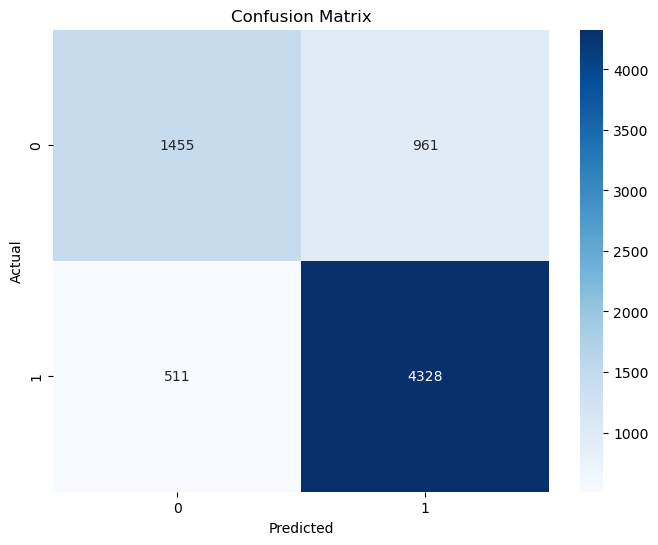

In [38]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpreting the confusion matrix:
1. True Negatives: 1,455 bookings correctly predicted as cancellations
2. True Positives: 4,328 bookings correctly predicted as non-cancellations

#### 6.1.3 Plotting the ROC Curve

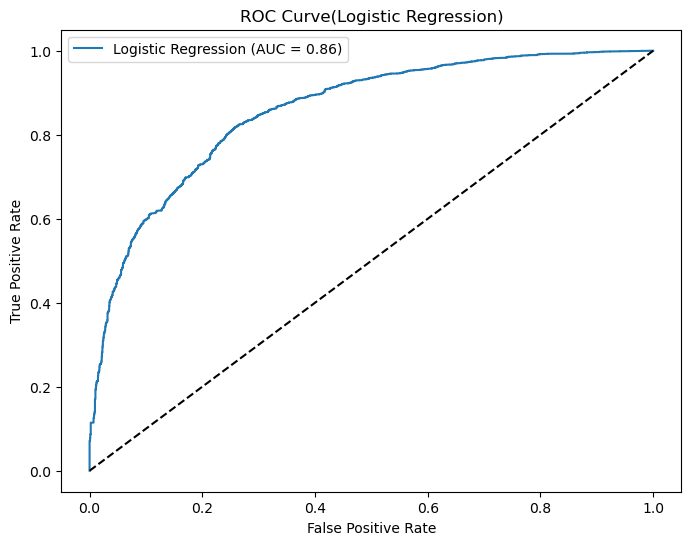

In [39]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = ' + str(round(roc_auc_score(y_test, y_pred_proba), 2)) + ')')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(Logistic Regression)')
plt.legend()
plt.show()

The AUC of 0.86 suggests that the model has a strong predictive power and can accurately distinguish between the two classes of cancellations and non cancellations. This is a good performance for this model considering it is the baseline to which other models will be compared. I will now proceed to create the Decision Tree Model

### 7. Decision Tree Model

In [40]:
# Creating copies of the final test and train datasets
X_test_dt = X_test_final.copy()
X_train_dt = X_train_final.copy()
y_test_dt = y_test.copy()
y_train_dt = y_train.copy()


#### 7.1 Checking for Class imbalance

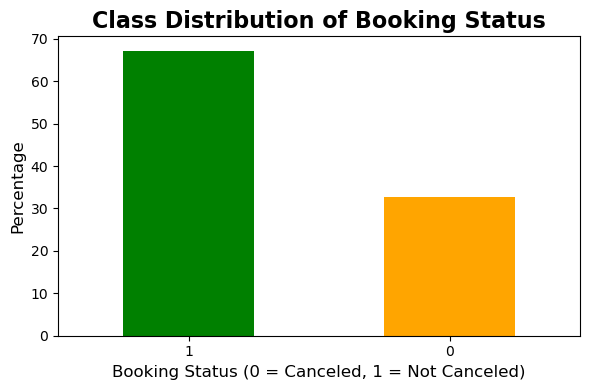

Class Distribution (%):
booking_status
1    67.236389
0    32.763611
Name: proportion, dtype: float64


In [41]:
# Checking class distribution in the target variable
class_distribution = data['booking_status'].value_counts(normalize=True) * 100

# Plotting the class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['green', 'orange'])
plt.title('Class Distribution of Booking Status', fontsize=16, fontweight='bold')
plt.xlabel('Booking Status (0 = Canceled, 1 = Not Canceled)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print class distribution
print("Class Distribution (%):")
print(class_distribution)

The graph above shows a significant class imbalance between the two classes in the target variable, booking_status. Class 1, which represents "Not Canceled," accounts for 67.2% of the total dataset, while Class 0, representing "Canceled," comprises only 32.8%. Due to this observation, our data will be balanced when instantiating our model.

In [42]:
# Create and train the decision tree
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train_dt, y_train_dt)

# Make predictions
y_pred_dt = dt.predict(X_test_dt)
y_pred_proba_dt = dt.predict_proba(X_test_dt)[:, 1]


#### 7.1.1 Performing hyperparameter tuning on the Decision Tree Model

In [43]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_dt, y_train_dt)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:")
print(best_params)
print("\
Best Cross-Validated AUC Score:", best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validated AUC Score: 0.9136642400343755


In [44]:
# Retrain the decision tree with the best parameters
best_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt.fit(X_train_dt, y_train_dt)

# Make predictions
y_pred_best = best_dt.predict(X_test_dt)
y_pred_proba_best = best_dt.predict_proba(X_test_dt)[:, 1]


#### 7.2 Evaluating the Decision Tree Model

In [45]:
# Print classification report
print("\
Classification Report (After Hyperparameter Tuning):")
print(classification_report(y_test_dt, y_pred_best))


Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2416
           1       0.88      0.87      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.81      0.82      0.82      7255
weighted avg       0.84      0.84      0.84      7255



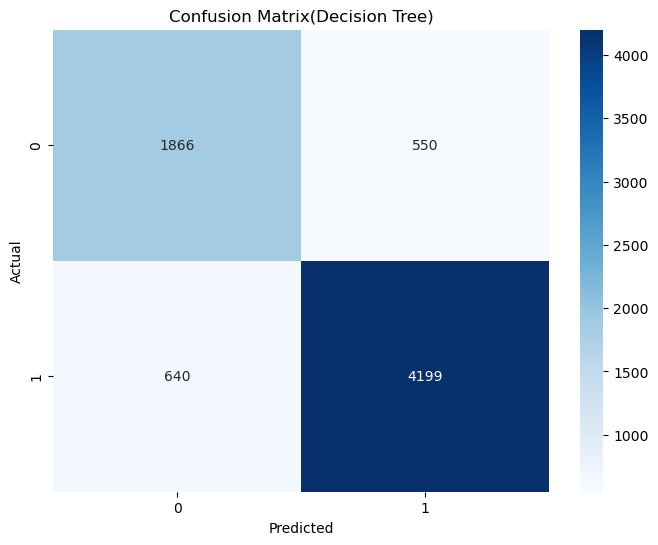

In [61]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_dt, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix(Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpreting the confusion matrix for the tuned Decision Tree Model:
1. True Negatives: 1,886 bookings correctly predicted as cancellations
2. True Positives: 4,199 bookings correctly predicted as non-cancellations

In [47]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_dt, y_pred_best)
print(f"The Accuracy Score of the Decision Tree Model is {accuracy}")

The Accuracy Score of the Decision Tree Model is 0.8359751895244659


Our Decision Tree Model has performed better in terms of accuracy compared to the Logistic regression model. The accuracy for logistic regression was 80% while for Decision tree is 84%. This means that our tuned decision tree model has a better predictive ability compared to the logistic model. 

#### 7.2 Plotting ROC Curve for tuned Decision Tree Model

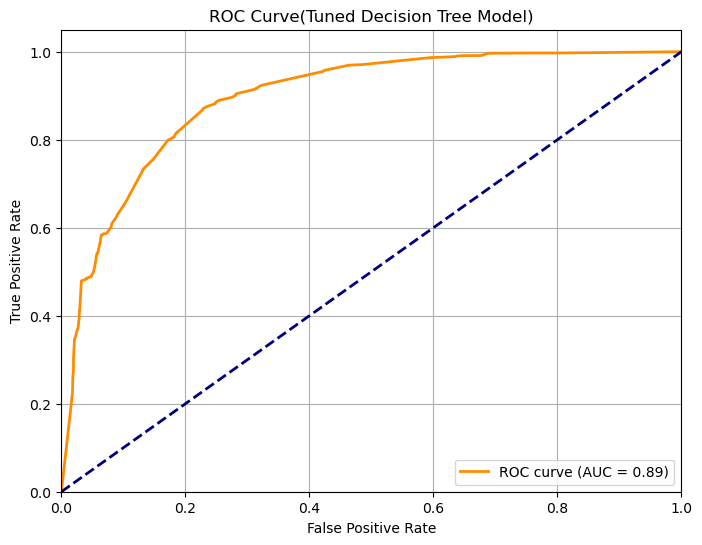

In [48]:
# Calculate ROC curve
fpr_best, tpr_best, _ = roc_curve(y_test_dt, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(Tuned Decision Tree Model)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The area under the ROC curve increased from 0.86 in the Logistic Regression model to 0.89 in the Decision Tree model. This improvement in the evaluation metrics indicates that the Decision Tree model outperforms the Logistic Regression model.

The hyperparameter tuning applied to the Decision Tree has led to enhanced model performance. Next, I will proceed to build a Random Forest model and compare its performance with the models developed so far.

### 8. Random Forest Model

In [49]:
# Creating copies of the final test and train datasets
X_test_rf = X_test_final.copy()
X_train_rf = X_train_final.copy()
y_test_rf = y_test.copy()
y_train_rf = y_train.copy()

In [50]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Train the model
rf.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = rf.predict(X_test_rf)
y_pred_proba_rf = rf.predict_proba(X_test_rf)[:, 1]


#### 8.1 Evaluate the model before tuning

In [51]:
# Print classification report
print("\
Classification Report (Random Forest):")
print(classification_report(y_test_rf, y_pred_rf))

# Calculate and plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      2416
           1       0.87      0.91      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.84      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



In [52]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_rf, y_pred_rf)
print(f"The Accuracy Score of the untuned Random Forest Model is {accuracy}")

The Accuracy Score of the untuned Random Forest Model is 0.8519641626464507


The accuracy score has improved from 84% in decision tree model to 85% in our untuned random forest model

#### 8.2 Plotting the ROC Curve for untuned Random Forest

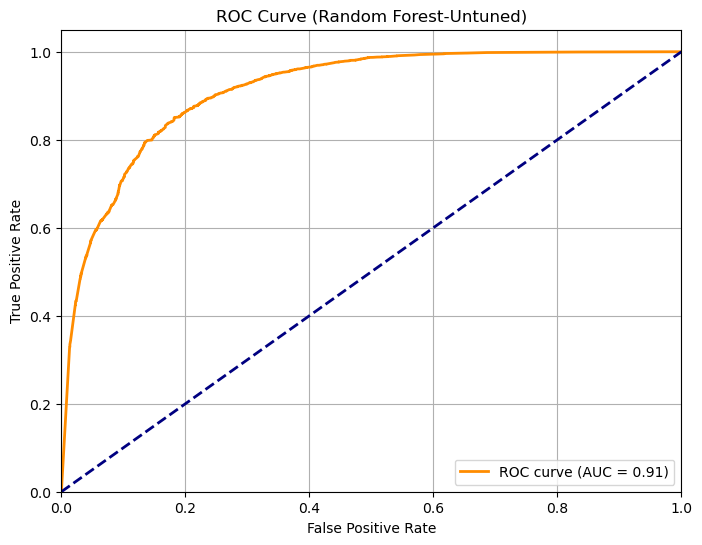

AUC Score (Random Forest): 0.9130292179709835


In [53]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest-Untuned)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\
AUC Score (Random Forest):", roc_auc_rf)

The untuned Random Forest model has an accuracy of 85% and an AUC of 0.91 which is an improvement from the previous model which had an accuracy of 84% and an AUC of 0.89. However, more can be done to improve the performance of this model. I shall therefore tune the model and get the best parameters to give us the best model performance.

#### 8.2.1 HyperParameter Tuning of Random Forest Model

In [54]:
# Performing hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create and run GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=5,scoring='roc_auc',n_jobs=-1,verbose=2)

# Fit the grid search
grid_search_rf.fit(X_train_rf, y_train_rf)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=2)

In [55]:
# Print the best parameters and score
print("Best parameters found for Random Forest:")
print(grid_search_rf.best_params_)
print("\
Best cross-validation score:", grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_pred_rf_best = best_rf_model.predict(X_test_rf)
y_pred_proba_rf_best = best_rf_model.predict_proba(X_test_rf)[:, 1]


Best parameters found for Random Forest:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9226403637314359


#### 8.3 Evaluating our tuned Random Forest Model

In [56]:
# Print classification report
print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test_rf, y_pred_rf_best))

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2416
           1       0.89      0.89      0.89      4839

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255



In [57]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test_rf, y_pred_rf_best)
print(f"The Accuracy Score of the tuned Random Forest Model is {accuracy}")

The Accuracy Score of the tuned Random Forest Model is 0.856512749827705


#### 8.4 Plotting the ROC Curve for tuned Random Forest Model

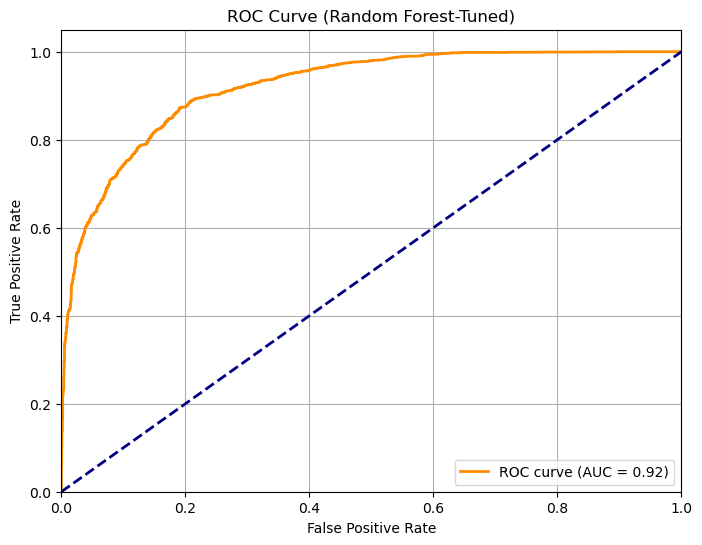

AUC Score (Tuned Random Forest): 0.9202725954544273


In [58]:
# Calculate and plot ROC curve
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test_dt, y_pred_proba_rf_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest-Tuned)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\
AUC Score (Tuned Random Forest):", roc_auc_rf_best)


The tuned Random Forest model has the best performance of all models created with an accuracy 0f 86% and an AUC of 0.92. This model therefore shows better generalization and more robust predictions across both booking and non-booking cases.

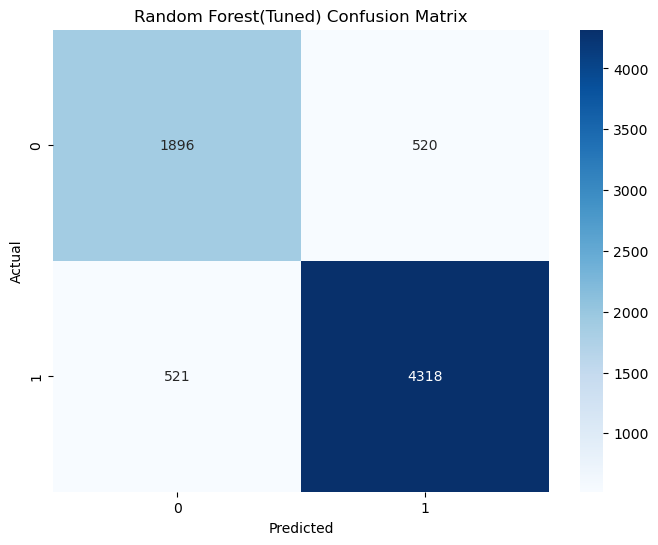

In [62]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_dt, y_pred_rf_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest(Tuned) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* True Negatives:(Correctly predicted no bookings)---1896

* True Positives:(Correctly predicted bookings)---4318

#### 8.5 Plotting all the combined ROC curves for the four Models

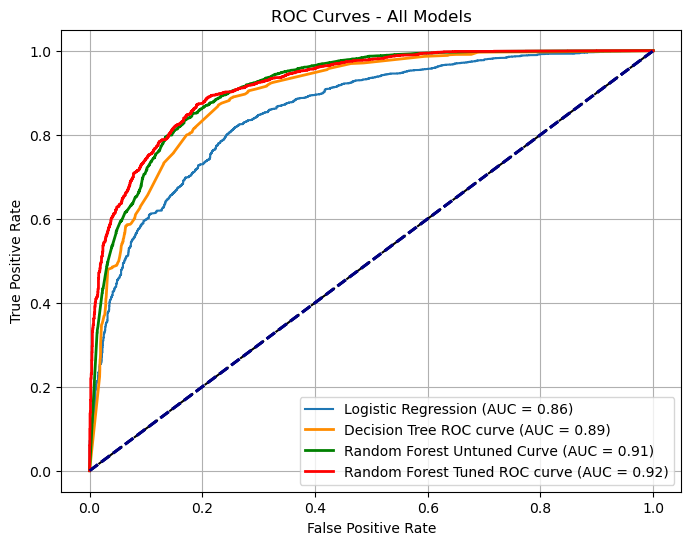

In [60]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = ' + str(round(roc_auc_score(y_test, y_pred_proba), 2)) + ')')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest Untuned Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr_rf_best, tpr_rf_best, color='red', lw=2, label=f'Random Forest Tuned ROC curve (AUC = {roc_auc_rf_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.grid()
plt.legend()
plt.show()

### 9. Findings
1. Based on the evaluation results, the tuned Random Forest Model outperforms all other models, with the highest Accuracy Score of 86% and the highest AUC of 0.92, indicating that it is the most effective in predicting hotel reservation cancellations.

2. The Untuned Random Forest Model also performed well, achieving an Accuracy Score of 85% and an AUC of 0.91.

3. The tuned Decision Tree Model showed a notable improvement over the baseline Logistic Regression Model, with an Accuracy Score of 84% and an AUC of 0.89, suggesting that decision trees, when optimized, are a reliable choice, though slightly less effective than Random Forest.

4. Finally, the Logistic Regression Model (Baseline), with an Accuracy Score of 79% and an AUC of 0.86, serves as a solid starting point but demonstrates lower performance compared to more complex models like Random Forest.


### 10. Conclusion
The Tuned Random Forest Model is the best-performing model for predicting hotel reservation cancellations, making it the most suitable choice for implementation in optimizing booking strategies, reducing cancellations, and improving overall hotel operations.

#### 11. Future Optimizations

From this Classification task, the tuned Random Forest Model is the most effective model for predicting hotel booking cancellations, providing the highest accuracy and AUC scores. However, there are several opportunities for further optimization and improvement in the future:

* Feature Engineering: Future work can focus on enhancing the model by incorporating additional features such as customer demographics, booking patterns, or external factors like weather or holidays, which could improve the model's predictive power.

* Model Ensemble: Combining the strengths of multiple models through techniques like stacking or boosting could improve performance. 

* Real-Time Predictions: Implementing this model into a real-time system for predictive booking management could help hotels take proactive measures to minimize cancellations, optimize room availability, and enhance overall guest satisfaction.